In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from matplotlib.gridspec import GridSpec
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'Helvetica'
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
color_list = [rgb_to_hex(237,74,184),rgb_to_hex(158,95,253),rgb_to_hex(255,206,81),rgb_to_hex(119,200,236),rgb_to_hex(24,218,210),rgb_to_hex(111,237,155),rgb_to_hex(102,0,51),rgb_to_hex(0,0,0),rgb_to_hex(211,196,147),rgb_to_hex(186,159,72),rgb_to_hex(89,80,65),rgb_to_hex(231,85,0),rgb_to_hex(0,138,148),rgb_to_hex(223,105,98)]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mark=np.array(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<', '>', '8', 's', 'p', ])
color_list = color_list*2

In [2]:
def E(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']

	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E += (a * t[i] + b) * N_t * phi_t  # row-wise 연산

	return E  # 각 row별 E 값이 담긴 Series 반환

def E_age(data_, h_pd=None, a=None, b=None):
	if isinstance(h_pd, pd.DataFrame): 
		eta = h_pd['h'] / data_['A']
	else: 
		eta = data_['h'] / data_['A']
	if a is None: 
		a, b = 0, 1

	E = pd.Series(0, index=data_.index)  # 각 row별로 저장할 E를 Series로 초기화

	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	E_age_list=[]
	for i in range(5):
		phi_t = np.exp(-eta / data_['eta_tilde' + age[i]])
		N_t = data_['RN' + age[i]] * data_['N']
		E_age_list.append((a * t[i] + b) * N_t * phi_t)  # row-wise 연산

	return E_age_list  # 각 row별 E 값이 담긴 Series 반환

def b(data_, a):
	atNp, E_0 = 0,0
	eta = data_['h']/data_['A']
	t = [1,2,3,4,5]
	age = ['40_49', '50_59', '60_69', '70_79', '80_']
	for i in range(5): 
		E_0 += sum(data_['RD'+age[i]]*data_['D'])
		phi_t = np.exp(-eta/data_['eta_tilde'+age[i]])
		N_t = data_['RN'+age[i]]*data_['N']
		atNp += sum( a*t[i]*N_t*phi_t)
	return (E_0-atNp)/E_0 # b

def find_min_max_a(year):
	# 데이터 로드
	data = pd.read_csv(f'/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/{year}_40.txt', sep=',')

	a_list = np.linspace(-2, 1, 31)
	a_min = None
	a_max = None

	prev_val_min = None
	prev_val_max = None

	for a_i, a in enumerate(a_list):
		# a_i 오타 수정 (ai → a_i)
		h_opt = pd.read_csv(f'/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/{year}MC_age_h_opt_a_{a_i}.csv')

		b_val = b(data, a)

		# 조건 1: a*5 + b crosses 0 from negative → positive
		val_min = a * 5 + b_val
		if prev_val_min is not None and prev_val_min < 0 and val_min >= 0 and a_min is None:
			a_min = a_i

		# 조건 2: a*1 + b crosses 0 from positive → negative
		val_max = a * 1 + b_val
		if prev_val_max is not None and prev_val_max >= 0 and val_max < 0:
			a_max = a_i - 1  # 직전 인덱스

		prev_val_min = val_min
		prev_val_max = val_max

	return a_min, a_max

In [3]:
a_min, a_max = find_min_max_a(2022)
print(np.linspace(-2, 1, 31)[a_min], np.linspace(-2, 1, 31)[a_max])

-1.4 0.30000000000000027


In [4]:
year = 2014
ai = 20# 20: 0 
a = np.linspace(-2,1,31)[ai]
data = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt',sep=',')
h_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(ai)+'.csv')

In [5]:
a_min

6

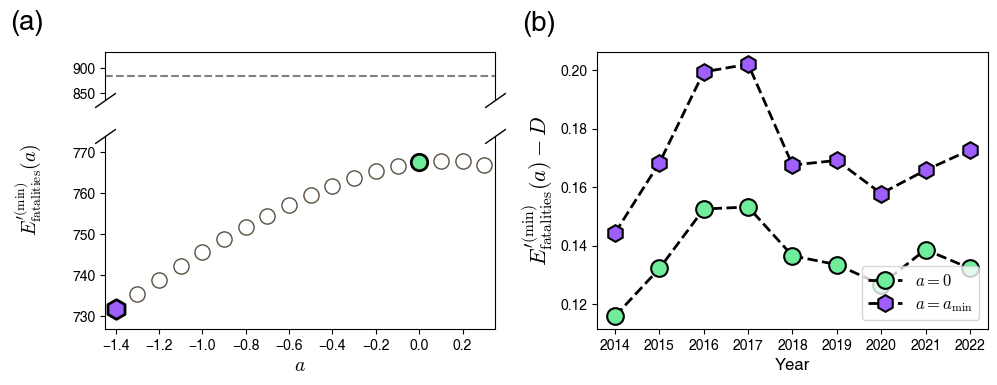

In [6]:
title_pos=[-0.15, 1.1]
title_size = 20
title_list = ['a', 'b', 'c', 'd', 'e','f','g','h','i']
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(2, 2, figure=fig, height_ratios=[1,4])
save_path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'

E_a_min=[]
E_a_max=[]
E_a_0=[]
D_list=[]
for year in range(2014,2023):
	path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
	data = pd.read_csv(path,sep=',')
	ai=0
	E_list=[]
	a_min, a_max = find_min_max_a(year)
	for i in range(31):
		E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
		E_list.append(E_[-1])
		ai+=1
	E_a_min.append(E_list[a_min])
	E_a_max.append(E_list[a_max])
	E_a_0.append(E_list[20])
	D_list.append(sum(data['D'] *data.iloc[:,19:24].sum(axis=1)))
year=2022
path = '/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt'
data = pd.read_csv(path,sep=',')
ai=0
E_list=[]
for i in range(31):
	E_ = np.load(save_path+str(year)+'_age_E_a_'+str(ai)+'.npy')
	E_list.append(E_[-1])
	ai+=1
D_40 = sum(data['D'] *data.iloc[:,19:24].sum(axis=1))
a_min, a_max = find_min_max_a(year)

ax0 = fig.add_subplot(gs[0, 0])
ax0.axhline(D_40, color='gray', linestyle='--', linewidth=1.5)
ax0.text(title_pos[0]-0.05, title_pos[1]+0.5, '('+title_list[0]+')', fontsize=title_size,  ha='center', va='center',transform=ax0.transAxes)
ax0.get_xaxis().set_visible(False)
ax0.tick_params(axis='y', labelsize=10)

ax = fig.add_subplot(gs[1, 0])
ax.scatter(np.linspace(-2,1,31), E_list, c='w', s=120, ec=rgb_to_hex(89,80,65)) #label=str(year)
ax.scatter(np.linspace(-2,1,31)[20], E_list[20], marker='o', ec='k',s=140,c=rgb_to_hex(111,237,155),linewidth=2)
# ax.scatter(np.linspace(-0.15,0.05,21)[i_001_], E_list[i_001_], marker='s', ec='k',s=120,c=rgb_to_hex(237,74,184))
ax.scatter(np.linspace(-2,1,31)[a_min], E_list[a_min], marker='h', ec='k',s=200,c=rgb_to_hex(158,95,253),linewidth=2)
# ax.scatter(np.linspace(-0.15,0.05,21)[i_003], E_list[i_003], marker='o', ec='k',s=140,c=rgb_to_hex(158,95,253))
ax.set_xlim(-1.45, 0.35)
ax.set_ylim(727, 774)
ax.tick_params(axis='x', labelsize=10, labelrotation=0)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel(r'$a$', size=14)

fig.text(0.01, 0.50, r'$E^{\prime\mathrm{(min)}}_\mathrm{fatalities}(a)$', va='center', rotation = 'vertical', fontsize = 14)
ax0.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)

# how big to make the diagonal lines in axes coordinates
d = .7    
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=15, linestyle="none", color='k', clip_on=False)

ax0.plot([0, 1], [0, 0], transform=ax0.transAxes, **kwargs)
ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)

ax1=fig.add_subplot(gs[:,1])
y_0 = (np.array(D_list) - np.array(E_a_0))/np.array(D_list)
y_min = (np.array(D_list)-np.array(E_a_min))/np.array(D_list)
ax1.plot(range(2014,2023), y_0, marker='o', mfc=rgb_to_hex(111,237,155) , mew=1.5,c='k', linestyle='--', linewidth=2, ms=12, label=r'$a=0$')
ax1.plot(range(2014,2023), y_min, marker='h', c='k', mew=1.5,ms=12 , mfc=rgb_to_hex(158,95,253), linestyle='--', linewidth=2, label=r'$a=a_\mathrm{min}$')
ax1.set_ylabel(r'$E^{\prime\mathrm{(min)}}_\mathrm{fatalities}(a)- D$', size=16)
ax1.set_xlabel(r'Year', size=12)
ax1.tick_params(axis='x', labelsize=10, labelrotation=0)
ax1.tick_params(axis='y', labelsize=10)
ax1.legend(loc=4, fontsize='large')
ax1.text(title_pos[0], title_pos[1], '('+title_list[1]+')', fontsize=title_size,  ha='center', va='center',transform=ax1.transAxes)

plt.tight_layout()
# plt.savefig('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/figure/a_E_year.pdf',format='pdf', transparent=True)
plt.show()

In [49]:
np.where(E_list == max(E_list))

(array([21]),)

In [51]:
np.linspace(-2,1,31)[21]

0.10000000000000009

# a에 따라 나이대 사망자수 변화

In [7]:
year = 2022

E_age_a = np.zeros([31, 5])
ai_min, ai_max = find_min_max_a(year)
for ai in range(31):
    #ai = 20# 20: 0 
    a = np.linspace(-2,1,31)[ai]
    data = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/data_over40/'+str(year)+'_40.txt',sep=',')
    h_opt = pd.read_csv('/home/users/YongsungKwon/workplace/Yongpyter/Tuberculosis_hospital_optimization/data_result/at_b_tau12345/opt_E_h_a2_1/'+str(year)+'MC_age_h_opt_a_'+str(ai)+'.csv')

    E_ = E_age(data, h_pd=h_opt,a=a,b=b(data,a=a))
    E_age_a[ai] = np.sum(E_,axis=1)

In [16]:
np.linspace(-2,1,31)[10]

-1.0

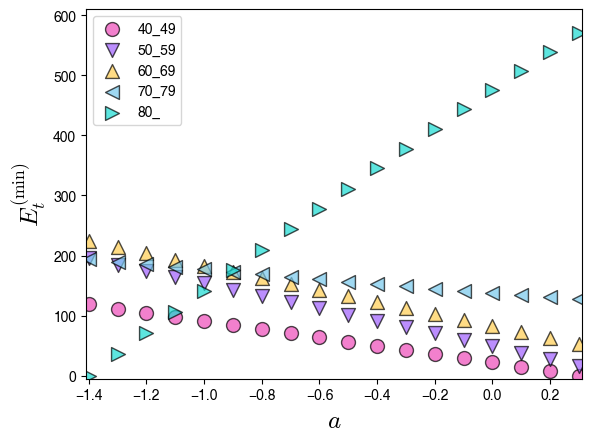

In [26]:
age = ['40_49', '50_59', '60_69', '70_79', '80_']
for age_i in range(5):
    plt.scatter(np.linspace(-2,1,31), E_age_a[:,age_i],ec='k',c=color_list[age_i],s=100,marker=mark[age_i], label=age[age_i],alpha=0.7)

# plt.xlim(np.linspace(-2,1,31)[a_min]-0.05, np.linspace(-2,1,31)[a_max]+0.05)
plt.xlim(-1.41, 0.31)
plt.ylim(-5, 610)
plt.xlabel(r'$a$',size=18)
plt.ylabel(r'$E^\mathrm{(min)}_t$',size=18)
plt.legend(loc=2)
plt.show()

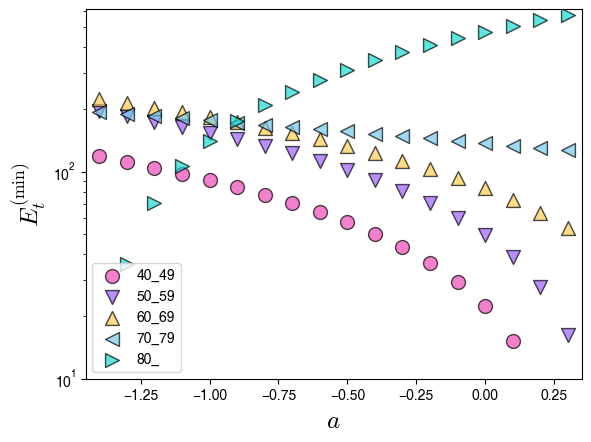

In [47]:
age = ['40_49', '50_59', '60_69', '70_79', '80_']
for age_i in range(5):
    plt.scatter(np.linspace(-2,1,31), E_age_a[:,age_i],ec='k',c=color_list[age_i],s=100,marker=mark[age_i], label=age[age_i],alpha=0.7)

plt.xlim(np.linspace(-2,1,31)[a_min]-0.05, np.linspace(-2,1,31)[a_max]+0.05)
# plt.xlim(-1.41, 0.31)
plt.ylim(10, 610)
plt.yscale('log')
plt.xlabel(r'$a$',size=18)
plt.ylabel(r'$E^\mathrm{(min)}_t$',size=18)
plt.legend(loc=3)
plt.show()

In [ ]:
E_list_sum_age = []
for age_i in range(5):
    E_age_a[:,age_i]

In [18]:
np.sum(E_age_a,axis=1)

array([708.44592301, 712.50714853, 716.5100349 , 720.44435179,
       724.30914473, 728.09622597, 731.79726553, 735.40826277,
       738.91648472, 742.31519058, 745.59066956, 748.73020779,
       751.72157108, 754.54534425, 757.18385671, 759.61472382,
       761.8138303 , 763.74531831, 765.37572889, 766.65827469,
       767.53551255, 767.93530424, 767.75516447, 766.85592254,
       765.01670627, 761.84725606, 756.38880827, 738.3651966 ,
       677.18761122, 559.7591499 , 411.17647111])

In [19]:
a_min

6

In [20]:
a_max

23

In [21]:
np.sum(E_age_a,axis=1)[6]

731.7972655314712

In [22]:
np.sum(E_age_a,axis=1)[23]

766.8559225409113

In [24]:
E_age_a[23]

array([3.36200168e-01, 1.63279183e+01, 5.32227269e+01, 1.27169782e+02,
       5.69799295e+02])

In [27]:
sum(E_age_a[23])

766.8559225409113

In [23]:
np.sum(E_age_a,axis=1)[20]

767.5355125513457

In [29]:
EE = []
for a_i in range(31):
    EE.append(np.sum(E_age_a,axis=1)[a_i])

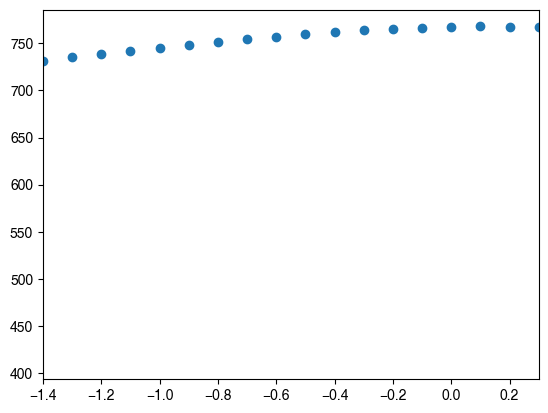

In [32]:
plt.scatter(np.linspace(-2,1,31), EE)
plt.xlim(-1.4, 0.3)
plt.show()

In [56]:
np.linspace(-2,1,31)[23]

0.30000000000000027

In [57]:
E_age_a[23]

array([3.36200168e-01, 1.63279183e+01, 5.32227269e+01, 1.27169782e+02,
       5.69799295e+02])

In [38]:
sum(E_age_a[11])

748.7302077869571